<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/Tugas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ============================================================
# 🔹 Cell 1: Import Library
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Mengatur style visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/Dataset_mesin/KNN/voice.csv'

data = pd.read_csv(file_path)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
# ============================================================
# 🔹 Cell 3: Mengecek Informasi dan Nilai Kosong
# ============================================================
data.info()
print("\nJumlah data kosong:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
# ============================================================
# 🔹 Cell 4: Encode Label (male/female → 0/1)
# ============================================================
le = LabelEncoder()
data["label"] = le.fit_transform(data["label"])  # male=1, female=0

# Memisahkan fitur dan label
X = data.drop(columns=["label"])
y = data["label"]

print("Jumlah fitur:", X.shape[1])
print("Kelas unik:", le.classes_)

Jumlah fitur: 20
Kelas unik: ['female' 'male']


In [8]:
# ============================================================
# 🔹 Cell 5: Normalisasi Data
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:

# ============================================================
# 🔹 Cell 6: Seleksi Fitur Menggunakan ANOVA (SelectKBest)
# ============================================================
selector = SelectKBest(score_func=f_classif, k=10)  # coba 10 fitur terbaik
X_new = selector.fit_transform(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Fitur terbaik berdasarkan ANOVA:\n", selected_features)

Fitur terbaik berdasarkan ANOVA:
 Index(['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid',
       'meanfun', 'mindom'],
      dtype='object')


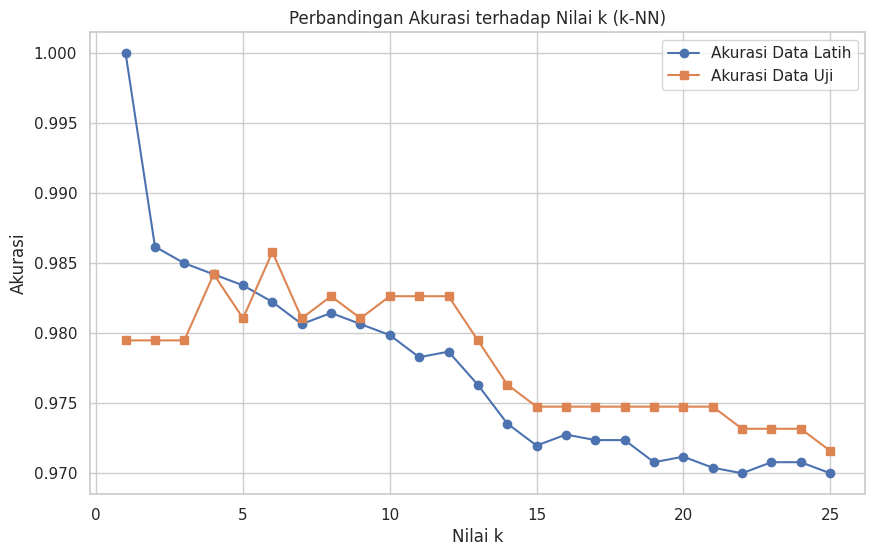

In [10]:

# ============================================================
# 🔹 Cell 7: Evaluasi Nilai k (1–25)
# ============================================================
k_values = range(1, 26)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_new, y_train)

    train_pred = knn.predict(X_new)
    test_pred = knn.predict(selector.transform(X_test))

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Visualisasi hasil
plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracies, marker='o', label='Akurasi Data Latih')
plt.plot(k_values, test_accuracies, marker='s', label='Akurasi Data Uji')
plt.title("Perbandingan Akurasi terhadap Nilai k (k-NN)")
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# ============================================================
# 🔹 Cell 8: Menentukan Nilai k Terbaik
# ============================================================
best_k = k_values[np.argmax(test_accuracies)]
best_acc = max(test_accuracies)

print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi tertinggi pada data uji: {best_acc:.4f}")

Nilai k terbaik: 6
Akurasi tertinggi pada data uji: 0.9858


In [12]:
# ============================================================
# 🔹 Cell 9: Evaluasi Model dengan k Terbaik
# ============================================================
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_new, y_train)
y_pred = best_knn.predict(selector.transform(X_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
[[312   5]
 [  4 313]]

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.98      0.99       317
        male       0.98      0.99      0.99       317

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



/tmp/ipython-input-740399338.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores.head(10), x="Score", y="Feature", palette="viridis")


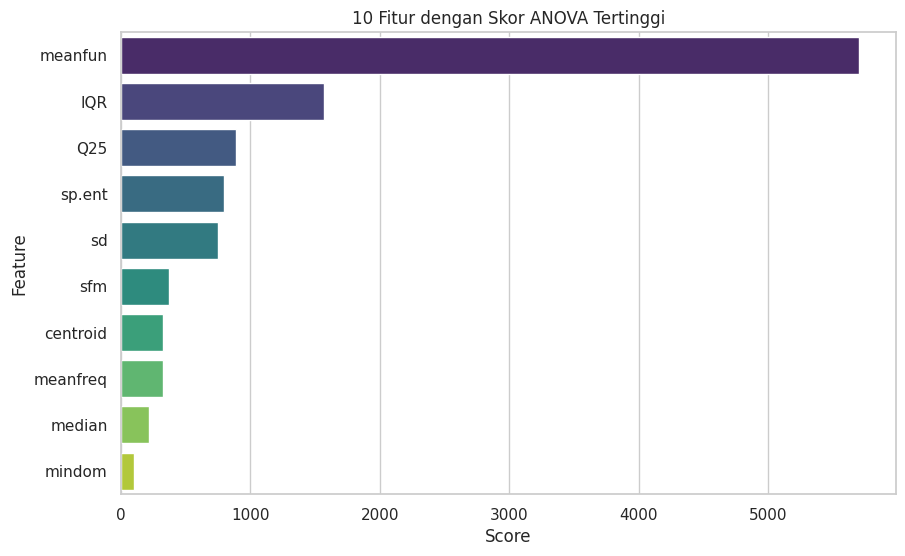

In [13]:

# ============================================================
# 🔹 Cell 10: Visualisasi Fitur Terbaik (Opsional)
# ============================================================
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_scores.head(10), x="Score", y="Feature", palette="viridis")
plt.title("10 Fitur dengan Skor ANOVA Tertinggi")
plt.show()